In [54]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
stock_prices = pd.read_csv("/content/drive/MyDrive/dl_practice/stock.csv")
stock_prices.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-26,26.624082,27.129914,26.327984,27.055891,45880000,0.0,0.0
1,2017-01-27,27.124978,27.608603,26.858490,27.578993,47199600,0.0,0.0
2,2017-01-30,27.369262,27.391470,26.626552,27.147188,49600400,0.0,0.0
3,2017-01-31,26.883162,27.154586,26.698101,26.939915,36275600,0.0,0.0
4,2017-02-01,27.285365,28.158852,27.107706,28.116903,59000400,0.0,0.0


In [12]:
stock_prices.shape

(1259, 8)

In [217]:
train = stock_prices.loc[0:1000, "Close"].values
test = stock_prices.loc[1000:, "Close"].values

In [218]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train.reshape(-1, 1))
test = scaler.transform(test.reshape(-1, 1))

In [219]:
def data_look_back(data, look_back=15):
  X = []
  y = []
  for val in range(len(data) - look_back - 1):
    X.append(data[val:val+look_back])
    y.append(data[val+look_back])
  return np.array(X), np.array(y)

In [220]:
look_back = 30
X_train, y_train = data_look_back(train, look_back)
X_test, y_test = data_look_back(test, look_back)

In [221]:
X_train.shape

(970, 30, 1)

In [222]:
# Resphaping data for LSTM input
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [223]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back), activation='relu'))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))

In [224]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics='mse'
)
early_stopping_callback = EarlyStopping(patience=10)


In [225]:
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping_callback],
    validation_data = (X_test, y_test)
)

Epoch 1/50
31/31 [==============================] - 2s 14ms/step - loss: 0.1183 - mse: 0.1183 - val_loss: 1.7875 - val_mse: 1.7875
Epoch 2/50
31/31 [==============================] - 0s 5ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0839 - val_mse: 0.0839
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 4/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.2188 - val_mse: 0.2188
Epoch 5/50
31/31 [==============================] - 0s 7ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.2393 - val_mse: 0.2393
Epoch 6/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.2664 - val_mse: 0.2664
Epoch 7/50
31/31 [==============================] - 0s 5ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.1669 - val_mse: 0.1669
Epoch 8/50
31/31 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0

In [226]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 4ms/step


In [227]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

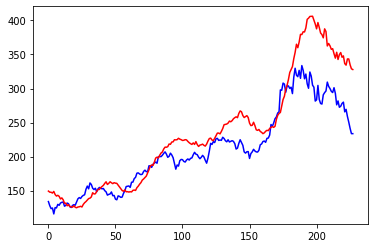

In [228]:
plt.plot(y_test, color='blue')
plt.plot(y_pred, color='red')
plt.show()

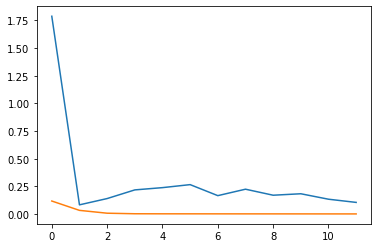

In [229]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])